In [144]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [145]:
data=pd.read_csv('data/knn_Data.txt',index_col=0)

In [146]:
data.head()

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608  0.759697   
1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450  0.675334   
2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781  1.626351   
3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128  1.409708   
4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727  1.115596   

        PJF       HQE       NXJ  TARGET CLASS  
0  0.643798  0.879422  1.231409             1  
1  1.013546  0.621552  1.492702             0  
2  1.154483  0.957877  1.285597             0  
3  1.380003  1.522692  1.153093             1  
4  0.646691  1.463812  1.419167             1

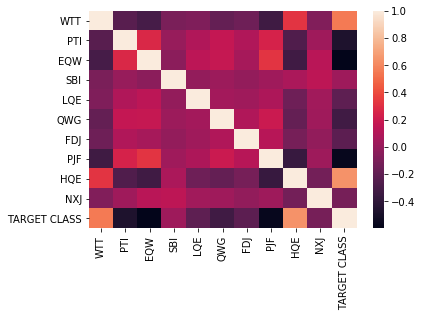

In [147]:
sns.heatmap(data.corr())

## Standardize the variables

In [148]:
x=data.drop(['TARGET CLASS'],axis=1)

In [149]:
scaler=StandardScaler()

In [150]:
scaled_features=scaler.fit_transform(x)

In [151]:
x_dataset=pd.DataFrame(data=scaled_features,columns=data.columns[:-1])
y=data['TARGET CLASS']

In [152]:
x_train,x_test,y_train,y_test=train_test_split(x_dataset,y,test_size=0.3)

## Using KNN

In [153]:
knn=KNeighborsClassifier(n_neighbors=1)

In [154]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [155]:
prd=knn.predict(x_test)

In [156]:
accuracy_score(y_test,prd)

0.9166666666666666

## Predication Evaluation

In [157]:
print(confusion_matrix(y_test,prd))

[[138  15]
 [ 10 137]]


In [158]:
print(classification_report(y_test,prd))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       153
           1       0.90      0.93      0.92       147

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



## Selection of k value

In [167]:
error_rate=[]
accuracy_score=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    prid_i=knn.predict(x_test)

    error_rate.append(np.mean(prid_i!=y_test))

Text(0, 0.5, 'error rate')

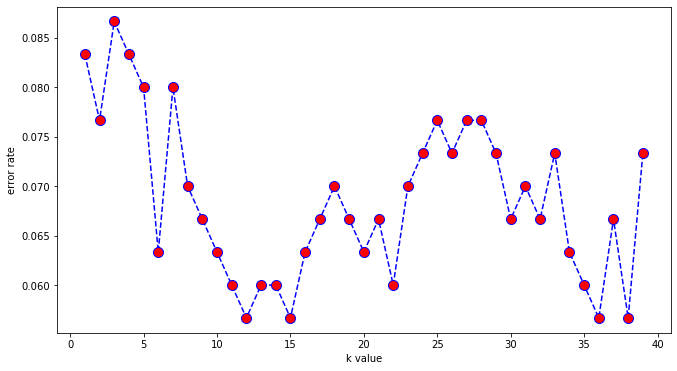

In [172]:
plt.figure(figsize=(11,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.xlabel('k value')
plt.ylabel('error rate')

In [187]:
## after the selection of the k value for the lowest error

knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train)
predication=knn.predict(x_test)

In [188]:
confusion_matrix(y_test,predication)

array([[140,  13],
       [  6, 141]])

In [189]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predication)

0.9366666666666666